# CP1 Data Story

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date
from datetime import datetime, timedelta
import seaborn as sns
import gender_guesser.detector as gender

In [49]:
df1=pd.read_csv ('Amazon.csv',parse_dates=['Date'])

In [53]:
df=df1.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36797 entries, 0 to 36796
Data columns (total 9 columns):
Date            36797 non-null datetime64[ns]
asin            36797 non-null object
helpful         36797 non-null object
overall         36797 non-null int64
reviewText      36797 non-null object
reviewTime      36797 non-null object
reviewerID      36797 non-null object
reviewerName    36797 non-null object
summary         36797 non-null object
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 2.5+ MB


In [44]:
# # 1 Can you count something interesting?
# the rating scores are in range [1,2,3,4,5]
# # Can you find trends (e.g. high, low, increasing, decreasing, anomalies)?
# # Can you make a bar plot or a histogram?
# histgram.
# # Can you compare two related quantities?
# # Can you make a scatterplot?
# with time
# # Can you make a time-series plot?
# # 2 Looking at the plots, what are some insights you can make? Do you see any correlations? Is there a hypothesis you’d like to investigate further? What other questions do the insights lead you to ask?
# from the scatter plots, we might thing there is one several outlier points since they are far away form others
# # 3 Now that you’ve asked questions, hopefully you’ve found some interesting insights. Is there a narrative or a way of presenting the insights using text and plots that tells a compelling story? What are some other trends/relationships you think will make the story more complete?
# 90% people give scores above 3
# -----------------------------------------------------
# reviewerID - ID of the reviewer, e.g. A2SUAM1J3GNN3B
# asin - ID of the product, e.g. 0000013714
# reviewerName - name of the reviewer
# helpful - helpfulness rating of the review, e.g. 2/3
# reviewText - text of the review
# overall - rating of the product
# summary - summary of the review
# unixReviewTime - time of the review (unix time)
# reviewTime - time of the review (raw)

In [54]:
df.index = df['Date']
df.head()

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary
Date,,,,,,,,,
2014-05-03,2014-05-03,B000H00VBQ,"[0, 0]",2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.","05 3, 2014",A11N155CW1UV02,AdrianaM,A little bit boring for me
2012-09-03,2012-09-03,B000H00VBQ,"[0, 0]",5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.","09 3, 2012",A3BC8O2KCL29V2,Carol T,Excellent Grown Up TV
2013-10-16,2013-10-16,B000H00VBQ,"[0, 1]",1,"This one is a real snoozer. Don't believe anything you read or hear, it's awful. I had no idea what the title means. Neither will you.","10 16, 2013",A60D5HQFOTSOM,"Daniel Cooper ""dancoopermedia""",Way too boring for me
2013-10-30,2013-10-30,B000H00VBQ,"[0, 0]",4,Mysteries are interesting. The tension between Robson and the tall blond is good but not always believable. She often seemed uncomfortable.,"10 30, 2013",A1RJPIGRSNX4PW,"J. Kaplan ""JJ""",Robson Green is mesmerizing
2009-02-11,2009-02-11,B000H00VBQ,"[1, 1]",5,"This show always is excellent, as far as british crime or mystery showsgoes this is one of the best ever made. The stories are well done and the acting is top notch with interesting twists in the realistic and brutal storylines. This show pulls no punches as it enters into the twisted minds of criminals and the profiler psychiatrist who helps out in a northern english city police force. The show looks like it is shot in Manchester but it is called by another name in the show. One episode is not on this disc the excellent 'prayer of the bone"" which is on a seperate disc. Still crime shows don't get much better than this one on either side of the ocean. It's just a great show that never has had a less than well made episode. Unfortunately like all British shows you only get about five shows a year , but these are an hour and a half shows , still one could hope for at least 8 of these a year. The realism and depth of the main character Tony Hill as protrayed by the excellent Robson Green is well worth viewing because he just makes this role truly part of himself in everyway. I bet he went to crime scenes even in real life to research his role. But the writers too must be applauded for their way above average stories. Lets hope this show continues on for many years to come.","02 11, 2009",A16XRPF40679KG,Michael Dobey,Robson green and great writing


In [55]:
def date_string(x):
    return x.strftime('%Y%m%d')
# date_string(datetime.now())

In [56]:
type(df['Date']) 

pandas.core.series.Series

In [57]:
df['Date'] = df['Date'].apply(date_string)

In [58]:
np.sort(df.overall.unique())

array([1, 2, 3, 4, 5])

In [59]:
for i in range(1,6):
    print(df[df.overall==i].overall.count(),len(df[df.overall==i])/len(df.overall))

1695 0.04606353778840666
1873 0.05090088865940158
4158 0.11299834225616219
8383 0.22781748512106964
20688 0.56221974617496


In [60]:
# 90% of review scores are above 2
1-(1718+1885)/len(df.overall)
# surprisingly high, Is it true?

0.902084409055086

In [61]:
# number of reviews, reviewers, videos, scores
n_reviews = len(df)
n_reviewers = df.reviewerID.unique().size
n_asins = df.asin.unique().size
n_overalls = df.overall.unique().size

print("Number of reviews: {:d}".format(n_reviews))
print("Number of reviewers: {:d}".format(n_reviewers))
print("Number of videos:  {:d}".format(n_asins))
print("Number of scores:  {:d}".format(n_overalls))

Number of reviews: 36797
Number of reviewers: 5130
Number of videos:  1683
Number of scores:  5


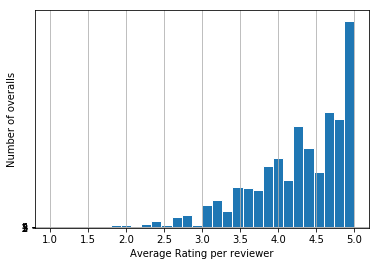

In [64]:
# the average score based on reviewers
grpID = df.groupby('reviewerID')
# counts = grp.reviewerID.count()  # number of reviews by each reviewer
means = grp.overall.mean()     # average scores for each reviewer
means.hist(bins=30, edgecolor='w', lw=1)
plt.xlabel("Average Rating per reviewer")
plt.ylabel("Number of overalls")
plt.yticks([ 1, 2, 3, 4, 5])
plt.show()


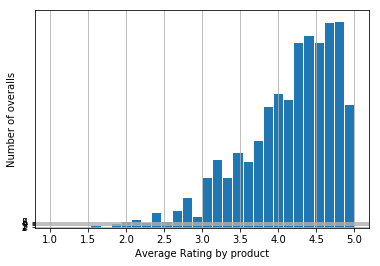

In [65]:
# the average score based on product
grp = df.groupby('asin')  
means = grp.overall.mean()     
means.hist(bins=30, edgecolor='w', lw=1)
plt.xlabel("Average Rating by product")
plt.ylabel("Number of overalls")
plt.yticks([ 1, 2, 3, 4, 5])
plt.show()

In [66]:
df.columns

Index(['Date', 'asin', 'helpful', 'overall', 'reviewText', 'reviewTime',
       'reviewerID', 'reviewerName', 'summary'],
      dtype='object')

In [67]:
# the average score by each month
agg = df[['overall']]
agg.head()

,overall
Date,
2014-05-03,2
2012-09-03,5
2013-10-16,1
2013-10-30,4
2009-02-11,5


In [81]:
data=agg.resample('M').mean()
len(data)

165

In [82]:
data.head(3)

,overall
Date,
2000-11-30,5.0
2000-12-31,NaN
2001-01-31,NaN


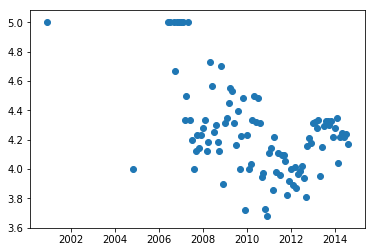

In [85]:
# parabolic trend
plt.scatter(data.index,data.overall)
plt.show()

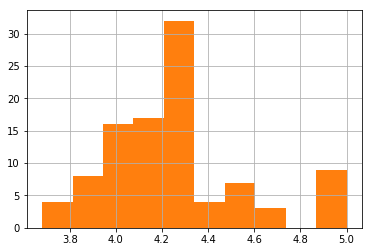

In [87]:
# the mean score distribution, kind of normal, 
data.overall.hist()
plt.show()

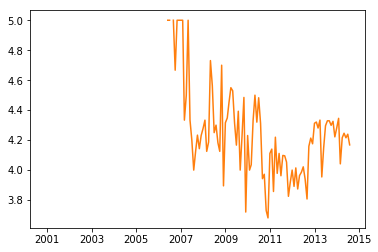

In [107]:
# how to make this one looks better? https://www.datacamp.com/community/tutorials/wordcloud-python
plt.plot(data.index,data.overall) # align='center',alpha =0.5
plt.show()

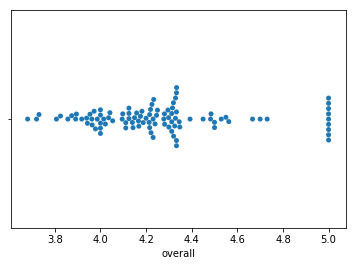

In [96]:
_=sns.swarmplot(data.overall)
plt.show()

In [98]:
# all the mean score is above 3, that make sense with the 90%

In [114]:
# the how to install gender guesser.
d = gender.Detector(case_sensitive=False)

In [116]:
first_names = []
for i in range(0,36797):
    name = str(df.reviewerName.values[i]).split(' ', 1)[0]
    first_names.append(name)

In [117]:
genders = []
for i in first_names[0:len(first_names)]:
    if d.get_gender(i) == 'male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_male':
        genders.append('male')
    elif d.get_gender(i) == 'mostly_female':
        genders.append('female')
    elif d.get_gender(i) == 'female':
        genders.append('female')
    else:
        genders.append('unknown')

In [132]:
df.insert(8, 'genders', genders) 
df.head(2)

,Date,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,genders,summary
Date,,,,,,,,,,
2014-05-03,20140503,B000H00VBQ,"[0, 0]",2,"I had big expectations because I love English TV, in particular Investigative and detective stuff but this guy is really boring. It didn't appeal to me at all.","05 3, 2014",A11N155CW1UV02,AdrianaM,unknown,A little bit boring for me
2012-09-03,20120903,B000H00VBQ,"[0, 0]",5,"I highly recommend this series. It is a must for anyone who is yearning to watch ""grown up"" television. Complex characters and plots to keep one totally involved. Thank you Amazin Prime.","09 3, 2012",A3BC8O2KCL29V2,Carol T,female,Excellent Grown Up TV


In [134]:
df.genders.unique()

array(['unknown', 'female', 'male'], dtype=object)

In [140]:
df[df.genders=='male'].genders.count(), df[df.genders=='female'].genders.count(), df[df.genders=='unknown'].genders.count()

(9755, 8716, 18326)

In [145]:
df[df.genders=='male'].overall.sum(), df[df.genders=='female'].overall.sum()

(40092, 38205)

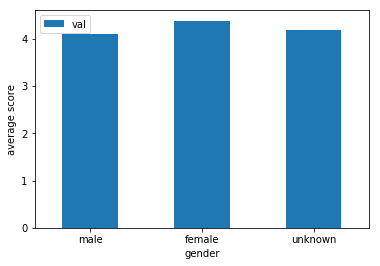

In [158]:
dfbar = pd.DataFrame({'gen':['male', 'female', 'unknown'], 
                      'val':[df[df.genders=='male'].overall.sum()/df[df.genders=='male'].genders.count(), 
                             df[df.genders=='female'].overall.sum()/df[df.genders=='female'].genders.count(), 
                             df[df.genders=='unknown'].overall.sum()/df[df.genders=='unknown'].genders.count()]})
dfbar.plot.bar(x='gen', y='val', rot=0)
plt.xlabel('gender')
plt.ylabel('average score')
plt.show()

In [ ]:
# WordCloud-> go to ML part
# how to do help helpful? use word cloud to figure out the relationship between summary and text?
# df.head()
# pd.set_option('display.max_colwidth', -1)
# df.reviewText.head()
# the word cloud can be waited in the later part.
# suggestion about how to do unit 8.5 based on this CP->above 20 or lower than 20 words, are they the same?